In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DigiPythonTools import DataUtility
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
min_sql = DataUtility()
# query = 'SELECT MIN(TagDateTime) AS mintime, MAX(TagDateTime) AS maxtime  FROM DigiProcessInfo.tblLpFmRtFceTrendData '
query_march = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2024-03-%';
"""

query_december = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-12-%';
"""

query_november = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-11-%';
"""
march_df = min_sql.min_query(query_march)
december_df = min_sql.min_query(query_december)
november_df = min_sql.min_query(query_november)

	opening conn from file
	conn opened


C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


In [42]:
def plot_tag_data(df, tag_name, month_name):
    filtered_df = df[df['TagName'] == tag_name]
    
    mean_value = filtered_df['TagValue'].mean()
    median_value = filtered_df['TagValue'].median()
    std_dev = filtered_df['TagValue'].std()
    min_value = filtered_df['TagValue'].min()
    max_value = filtered_df['TagValue'].max()
    
    print(f"Staitstics for {tag_name} - {month_name}: ")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}")
    
    
    plt.figure(figsize=(14, 7))
    plt.plot(filtered_df['TagDateTime'], filtered_df['TagValue'], label=tag_name)
    plt.xlabel('DateTime')
    plt.ylabel('Value')
    plt.title(f'{tag_name} values for {month_name}')
    plt.legend()
    plt.show()

In [4]:
# List of tags
tags = [
'RTFCE1_Zone1AirGasRatio'
'RTFCE1_Zone1TempDer'
'RTFCE1_Zone1AirValveGain'
'RTFCE1_Zone1GasValveDer'
'RTFCE1_Zone1RationSP'
'RTFCE1_Zone1AirValveSP'
'RTFCE1_Zone1GasFlow'
'RTFCE1_Zone1GasValveOut'
'RTFCE1_Zone1GasValvePos'
'RTFCE1_Zone1TempGain'
'RTFCE1_Zone1AirValveOut'
'RTFCE1_Zone1TempOutput'
'RTFCE1_Zone1GasValveGain'
'RTFCE1_Zone1TempInt'
'RTFCE1_Zone1AirFlowSCFH'
'RTFCE1_Zone1TempSP'
'RTFCE1_Zone1AirValveInt'
'RTFCE1_Zone1AirValvePos'
'RTFCE1_Zone1O2SensorFDBK'
'RTFCE1_Zone1GasValveInt'
'RTFCE1_Zone1GasFlowSCFH'
'RTFCE1_Zone1GasValveSP'
'RTFCE1_Zone1AirFlow'
'RTFCE1_Zone1TempFDBK'
'RTFCE1_Zone1AirValveDer'
]

In [74]:
def perform_pca(df, tag_name, month_name):
    
    # Standardize the data
    filtered_df = df[df['TagName'] == tag_name]
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(filtered_df[['TagValue']])
    
    # Apply PCA with n_components=1
    pca = PCA(n_components=1)
    principal_components = pca.fit_transform(standardized_data)
    
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1'])
    
    # Plot the principal component
    plt.figure(figsize=(14, 7))
    plt.scatter(pca_df.index, pca_df['Principal Component 1'])
    plt.xlabel('Index')
    plt.ylabel('Principal Component 1')
    plt.title(f'PCA of {tag_name} values for {month_name}')
    plt.show()
    
    # Print explained variance ratio
    print(f"Explained Variance Ratio for {tag_name} - {month_name}: {pca.explained_variance_ratio_}")


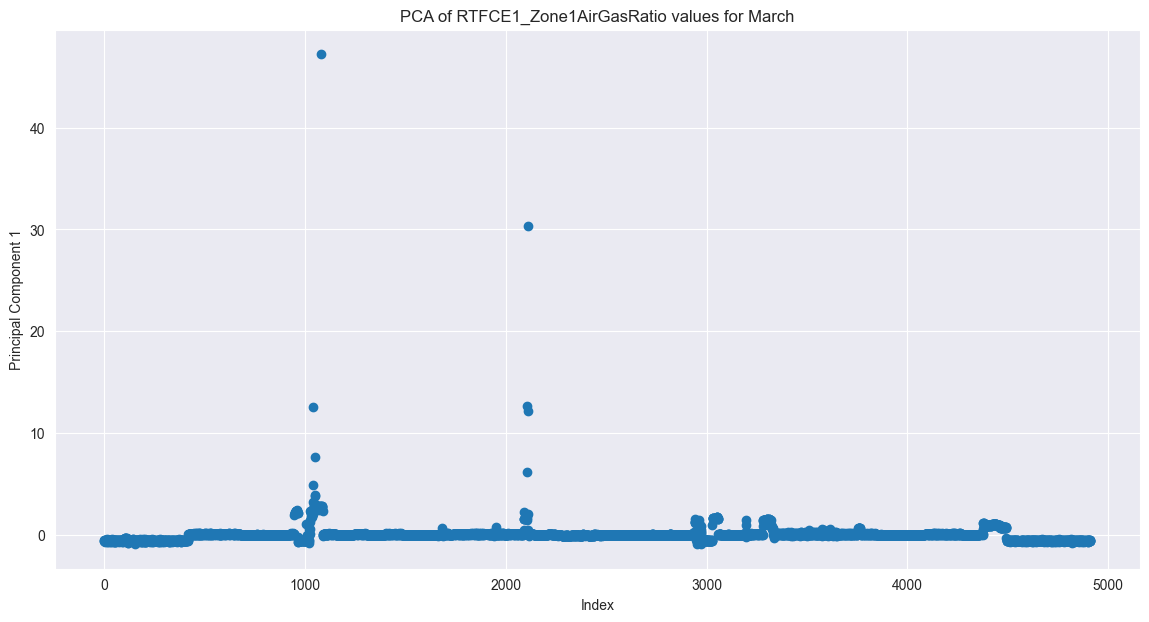

Explained Variance Ratio for RTFCE1_Zone1AirGasRatio - March: [1.]


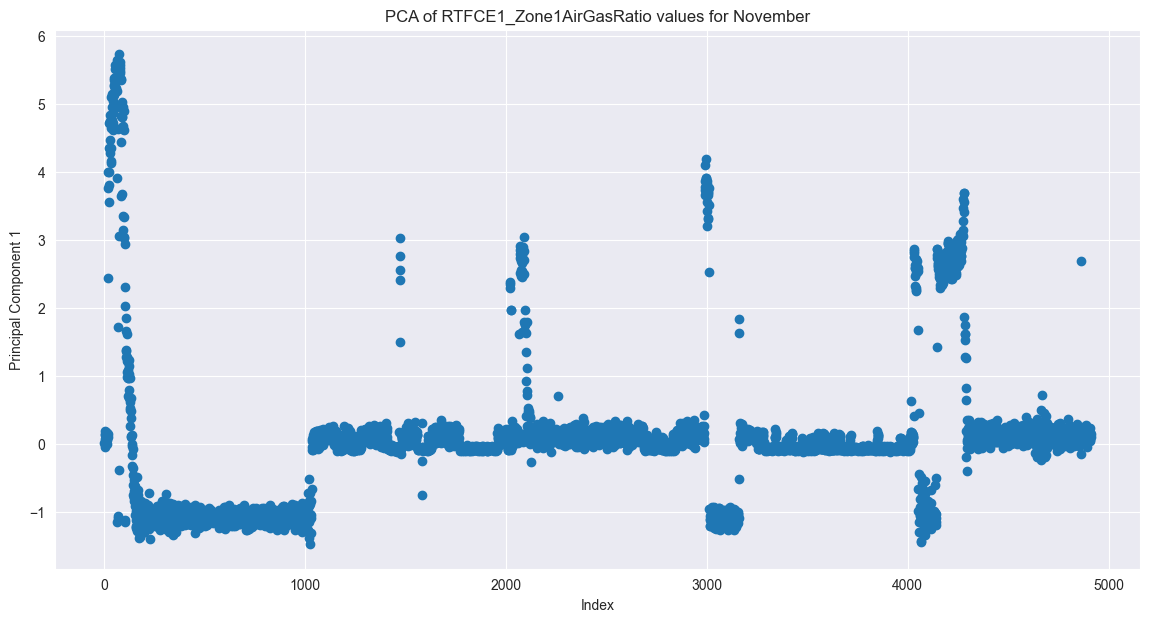

Explained Variance Ratio for RTFCE1_Zone1AirGasRatio - November: [1.]


In [76]:
perform_pca(march_df,'RTFCE1_Zone1AirGasRatio', 'March')

perform_pca(november_df,'RTFCE1_Zone1AirGasRatio', 'November')

Staitstics for RTFCE1_Zone1AirGasRatio - March: 
Mean: 1.1893191892272936
Median: 1.1774628825982412
Standard Deviation: 0.2334030602914086
Min: 0.9692671425970395
Max: 12.211014792841276


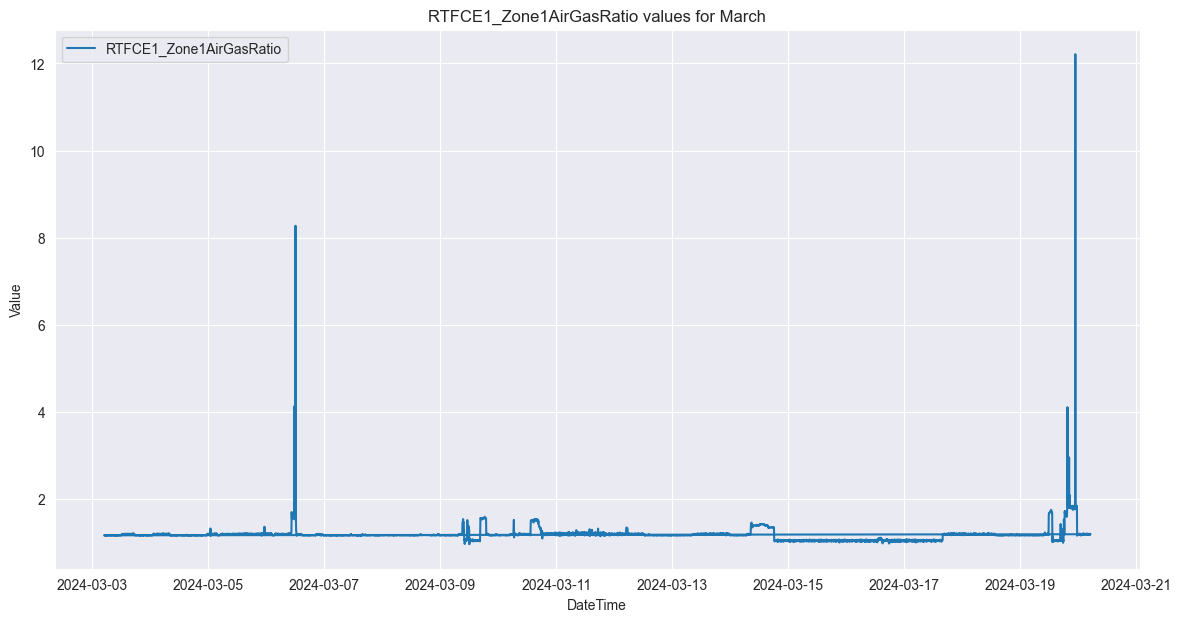

In [43]:
plot_tag_data(march_df,'RTFCE1_Zone1AirGasRatio', 'March')


Staitstics for RTFCE1_Zone1AirGasRatio - November: 
Mean: 1.1841330559429157
Median: 1.1839384951035181
Standard Deviation: 0.12334856672774235
Min: 1.0023355308725437
Max: 1.8904270651408037


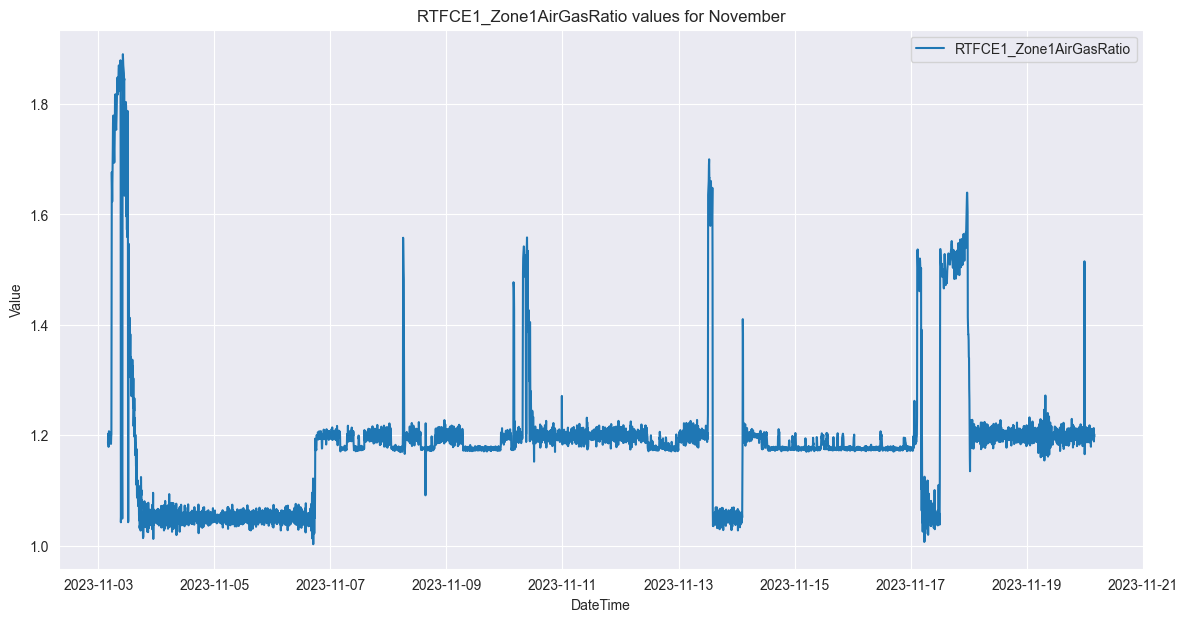

In [44]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirGasRatio', 'November')

In [8]:
# Define queries for the 15th of each month 
query_march_15 = """ SELECT * FROM DigiProcessInfo.tblLpFmRtFceTrendData
 WHERE CONVERT(VARCHAR(10), TagDateTime, 120) = '2024-03-15'; """ 
query_november_15 = """ SELECT * FROM DigiProcessInfo.tblLpFmRtFceTrendData 
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) = '2023-11-15'; """ 

march_15_df = min_sql.min_query(query_march_15)
november_15_df = min_sql.min_query(query_november_15)


C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


Staitstics for RTFCE1_Zone1AirGasRatio - November: 
Mean: 1.179333407440737
Median: 1.1763045064608255
Standard Deviation: 0.008305818675423966
Min: 1.1698993802070619
Max: 1.2040229558944702


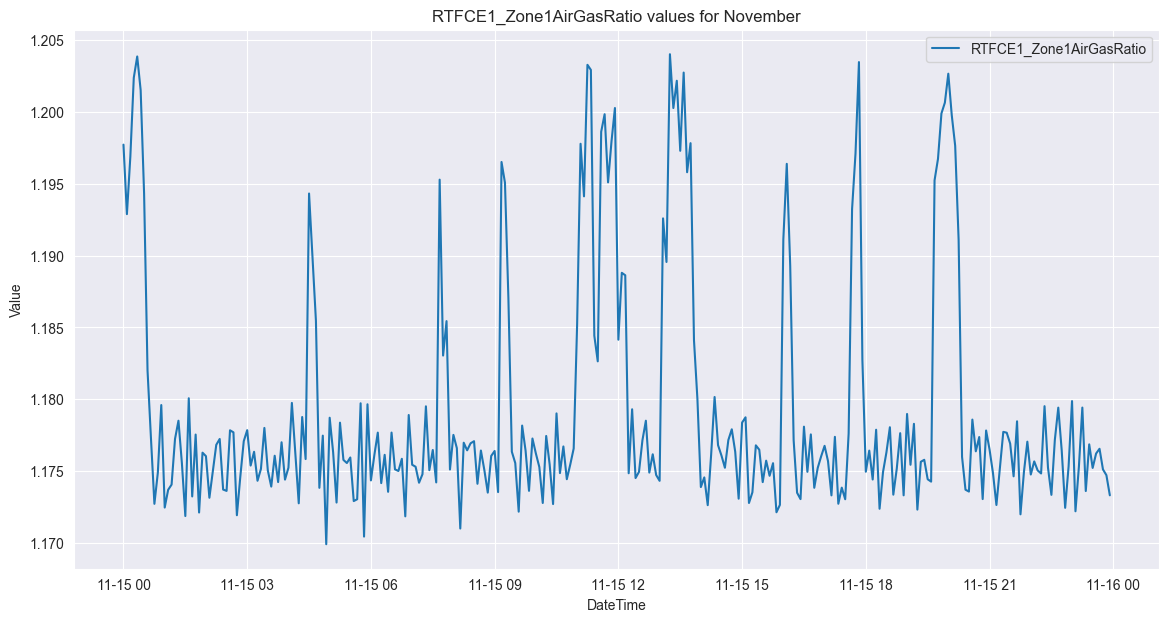

In [45]:
plot_tag_data(november_15_df, 'RTFCE1_Zone1AirGasRatio', 'November')

Staitstics for RTFCE1_Zone1AirGasRatio - March: 
Mean: 1.0499531729025466
Median: 1.0497438088657458
Standard Deviation: 0.012691316369037552
Min: 1.0083980956572294
Max: 1.078567724101146


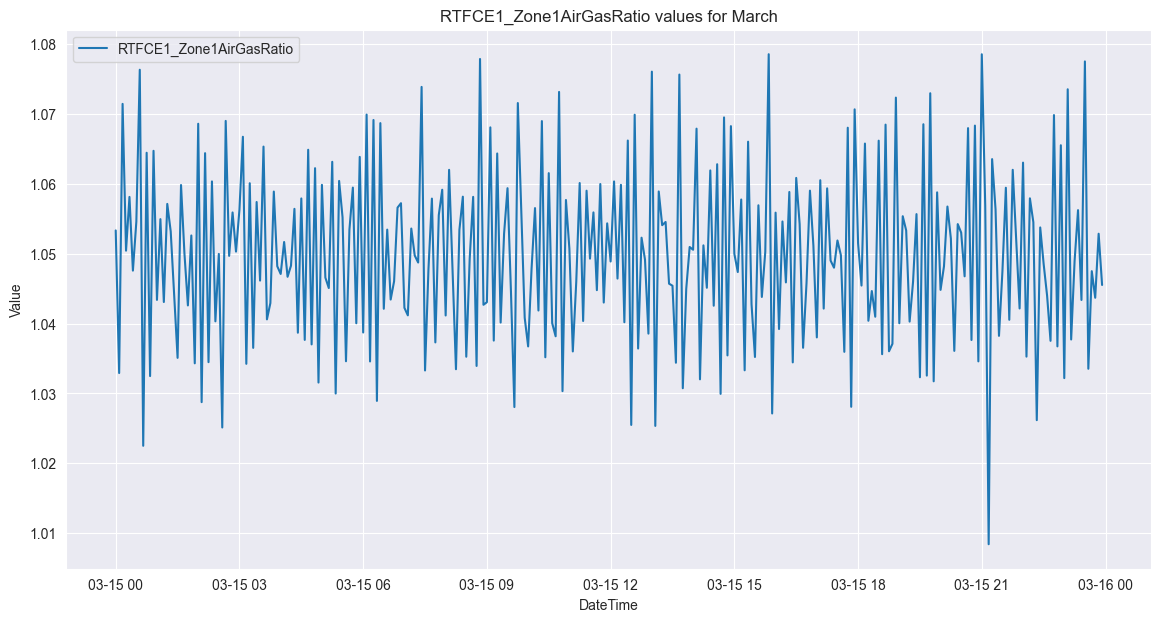

In [46]:
plot_tag_data(march_15_df, 'RTFCE1_Zone1AirGasRatio', 'March')

Staitstics for RTFCE1_Zone1AirGasRatio - November: 
Mean: 1.1841330559429157
Median: 1.1839384951035181
Standard Deviation: 0.12334856672774235
Min: 1.0023355308725437
Max: 1.8904270651408037


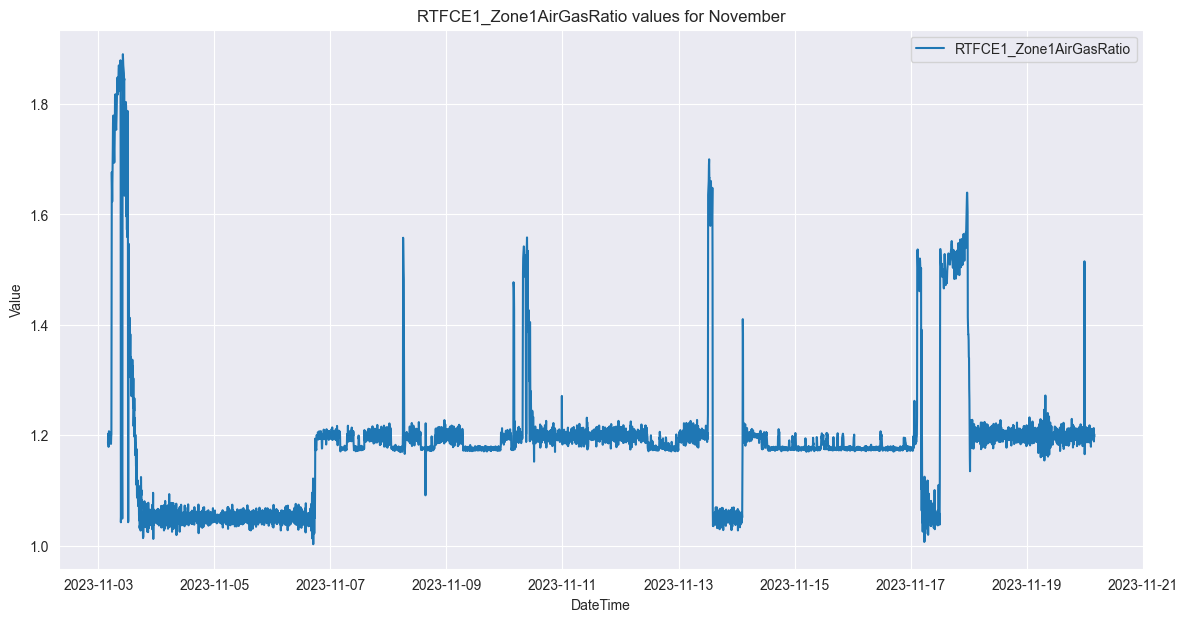

In [47]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirGasRatio', 'November')

Staitstics for RTFCE1_Zone1AirGasRatio - March: 
Mean: 1.1893191892272936
Median: 1.1774628825982412
Standard Deviation: 0.2334030602914086
Min: 0.9692671425970395
Max: 12.211014792841276


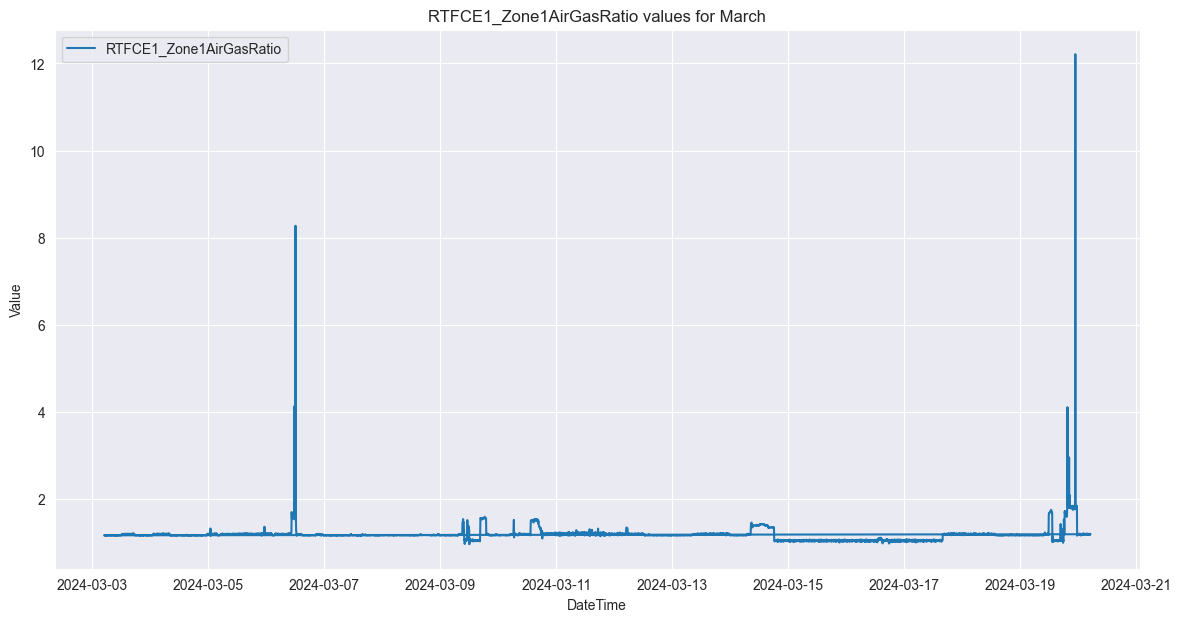

In [48]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirGasRatio', 'March')

Staitstics for RTFCE1_Zone1AirValveGain - November: 
Mean: 0.75
Median: 0.75
Standard Deviation: 0.0
Min: 0.75
Max: 0.75


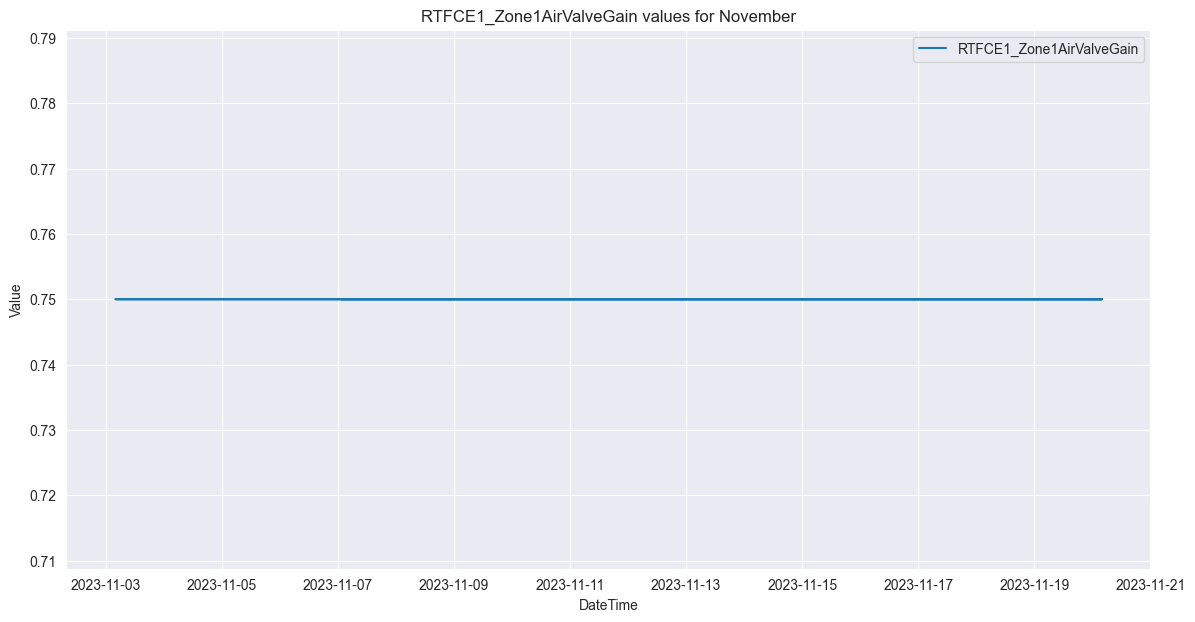

In [49]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirValveGain', 'November')

Staitstics for RTFCE1_Zone1AirValveGain - March: 
Mean: 0.75
Median: 0.75
Standard Deviation: 0.0
Min: 0.75
Max: 0.75


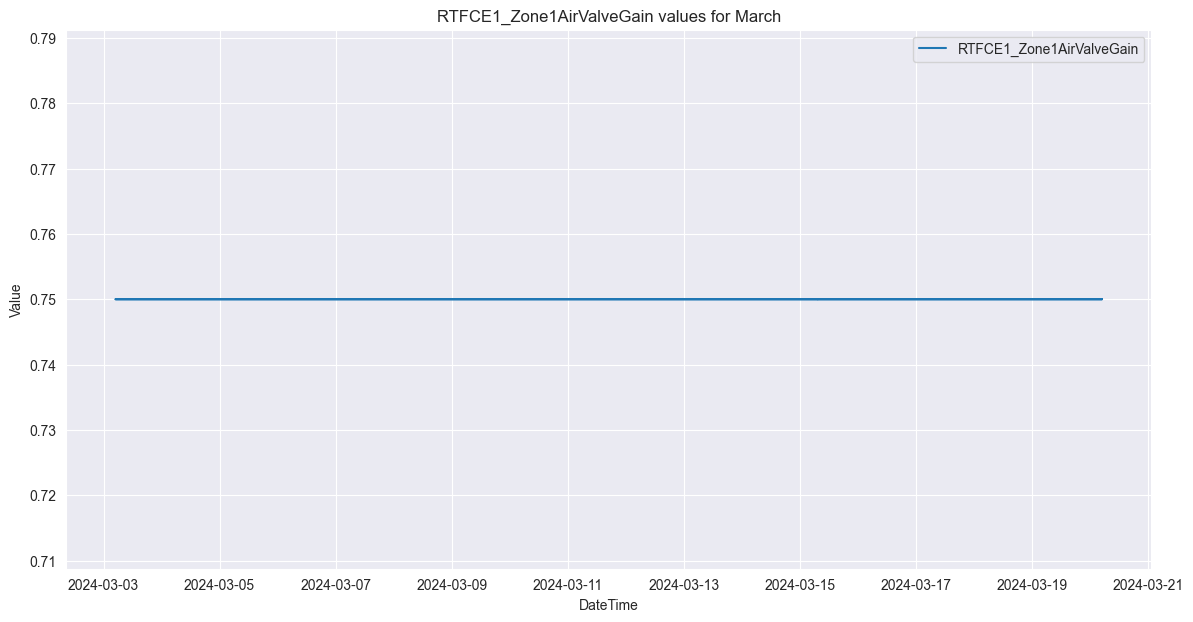

In [50]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirValveGain', 'March')


Staitstics for RTFCE1_Zone1AirValveSP - November: 
Mean: 51.475971861867855
Median: 32.065500159893034
Standard Deviation: 43.09965829625571
Min: 0.0
Max: 120.0


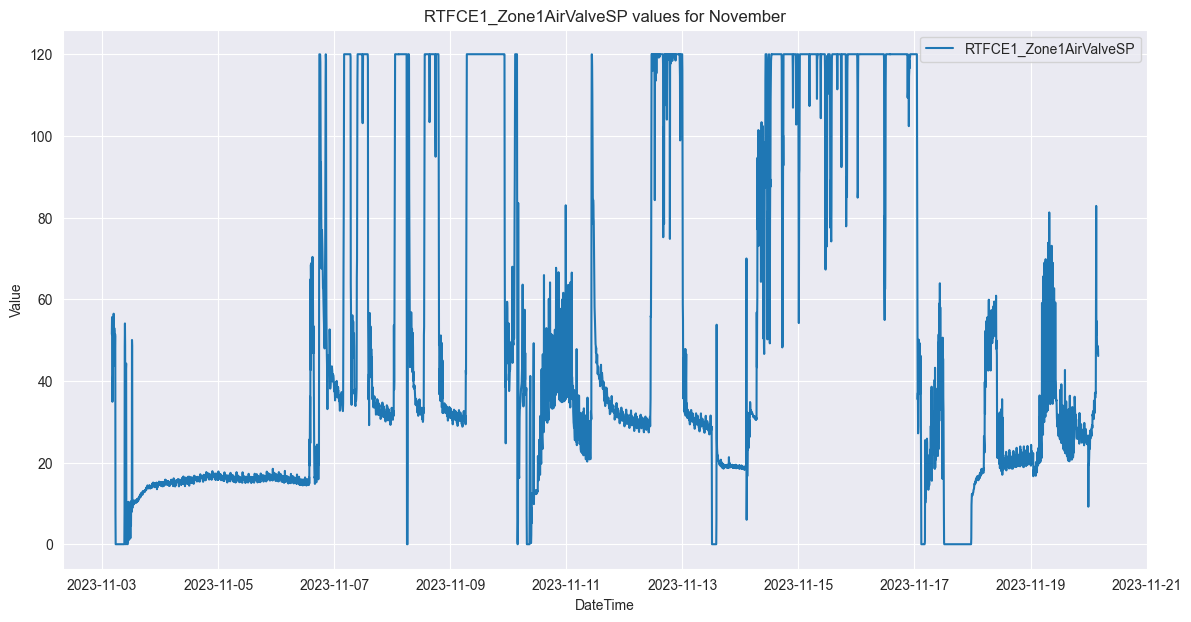

In [51]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirValveSP', 'November')

Staitstics for RTFCE1_Zone1AirValveSP - March: 
Mean: 62.349383346783775
Median: 38.21176621869405
Standard Deviation: 46.31454997741644
Min: 0.0
Max: 120.0


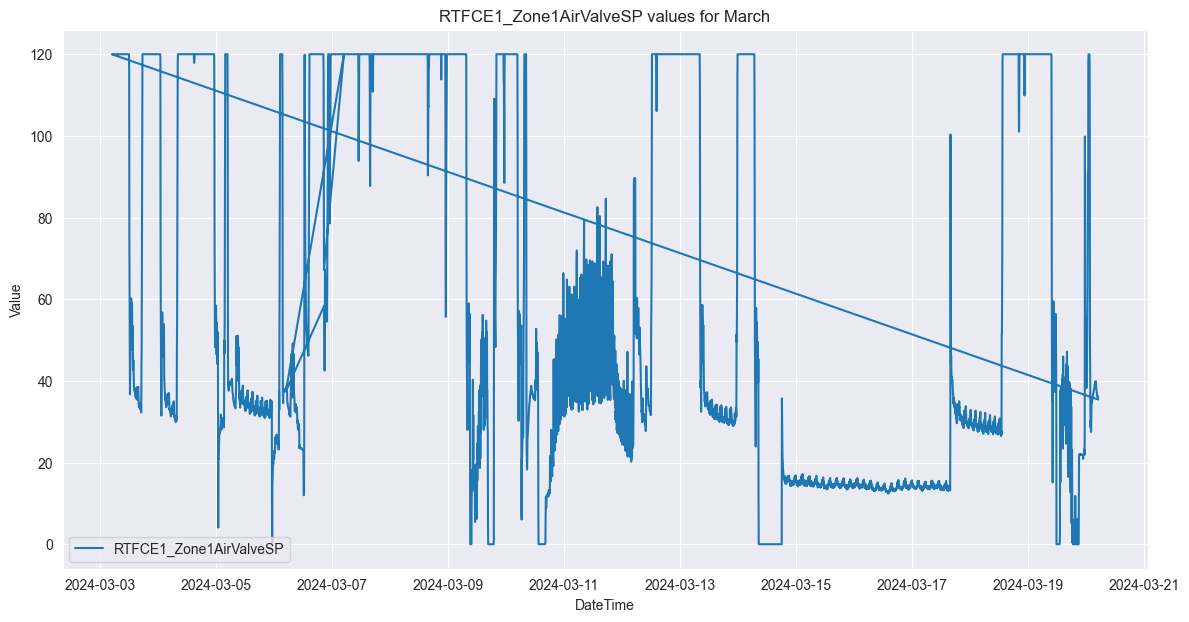

In [52]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirValveSP', 'March')

Staitstics for RTFCE1_Zone1AirValveOut - November: 
Mean: 45.68592252941357
Median: 36.23214698310852
Standard Deviation: 30.4821007343662
Min: 0.0
Max: 99.89259506121317


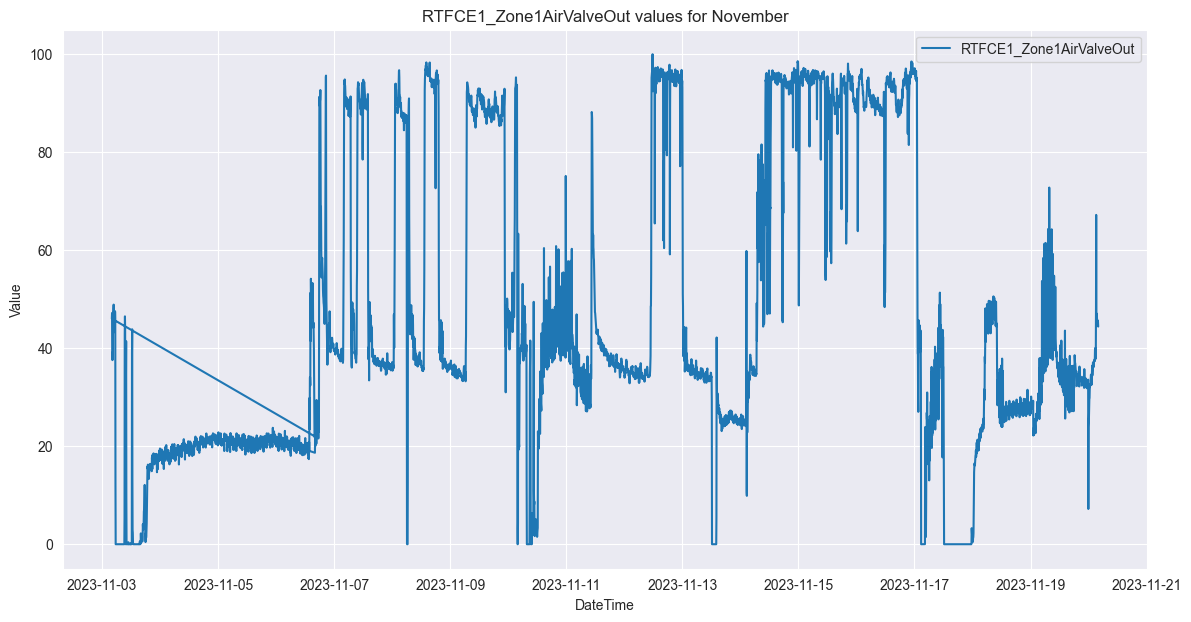

In [53]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirValveOut', 'November')

Staitstics for RTFCE1_Zone1AirValveOut - March: 
Mean: 52.84557135394965
Median: 40.62671773134868
Standard Deviation: 32.07623290456931
Min: 0.0
Max: 100.0


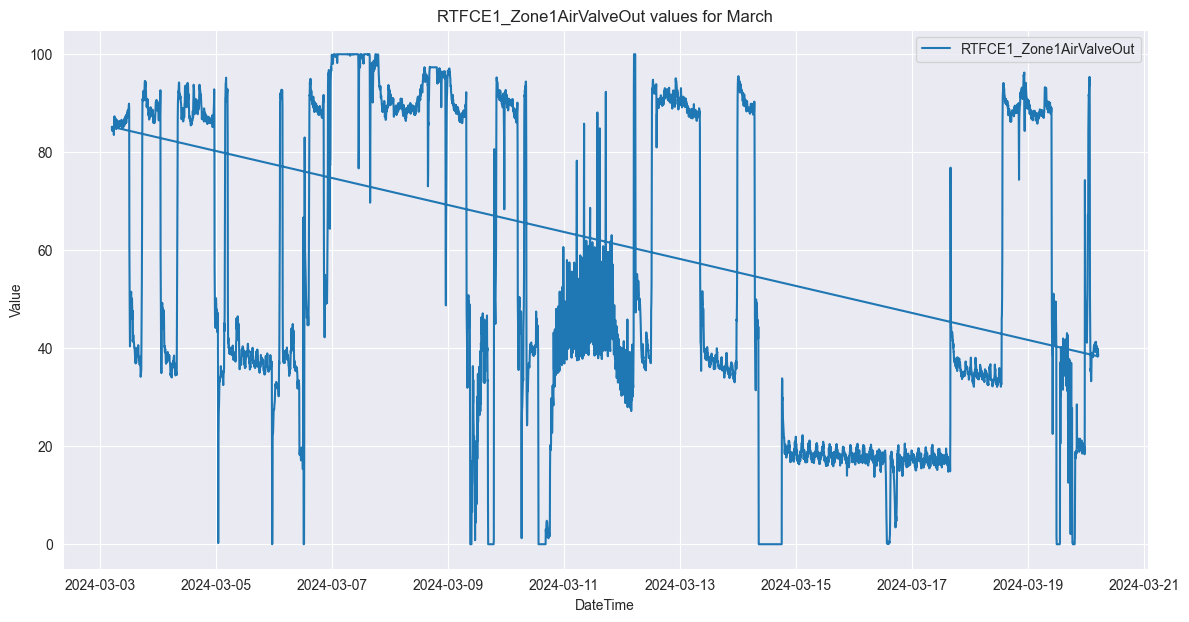

In [54]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirValveOut', 'March')

Staitstics for RTFCE1_Zone1AirFlowSCFH - November: 
Mean: 39533.33823388368
Median: 24555.991223151043
Standard Deviation: 31615.492986494795
Min: 9669.992776914063
Max: 90593.76922747395


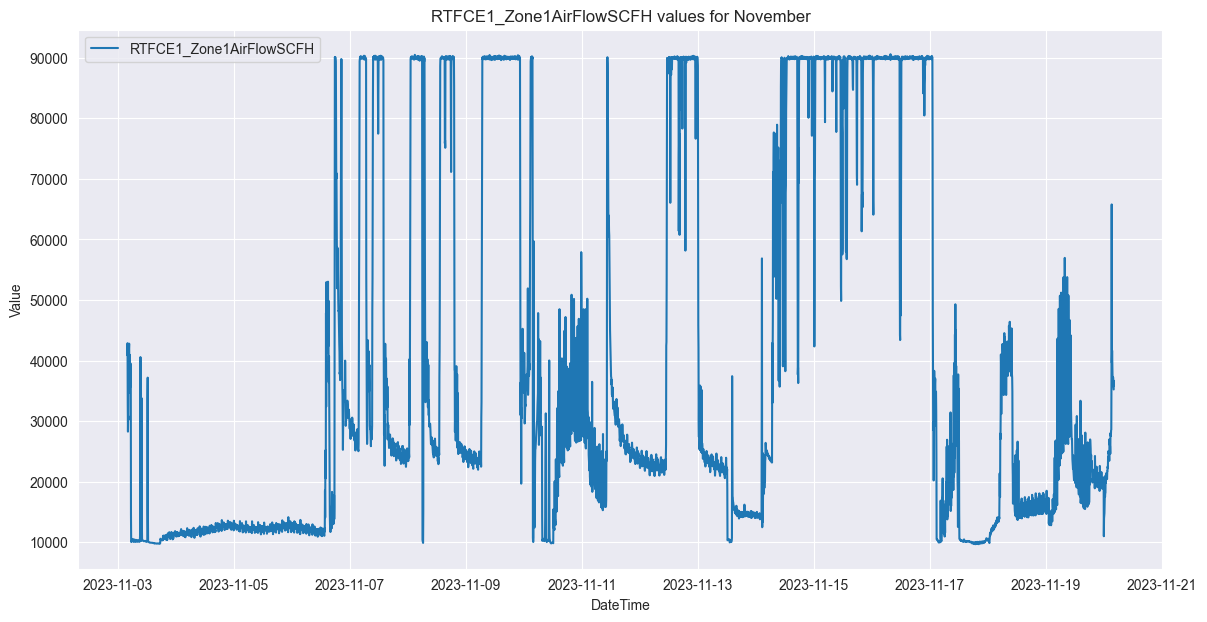

In [55]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirFlowSCFH', 'November')

Staitstics for RTFCE1_Zone1AirFlowSCFH - March: 
Mean: 47488.14161365964
Median: 29403.288358346355
Standard Deviation: 33994.65550733324
Min: 8993.597228535156
Max: 90442.4674207552


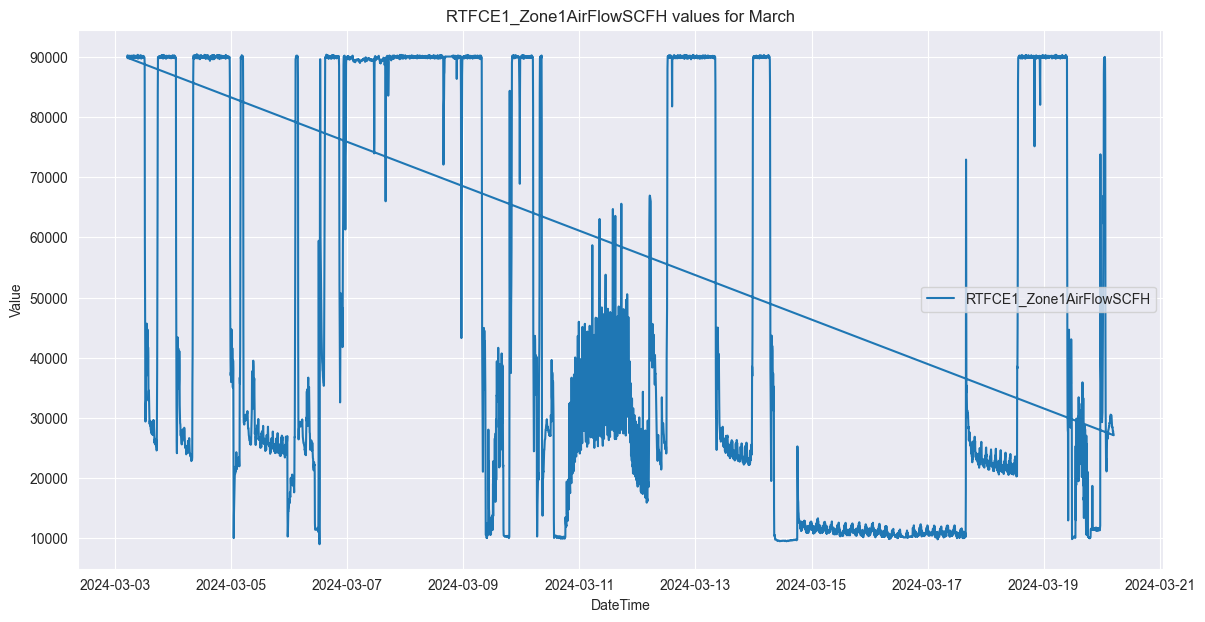

In [56]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirFlowSCFH', 'March')

Staitstics for RTFCE1_Zone1AirValveInt - November: 
Mean: 0.5
Median: 0.5
Standard Deviation: 0.0
Min: 0.5
Max: 0.5


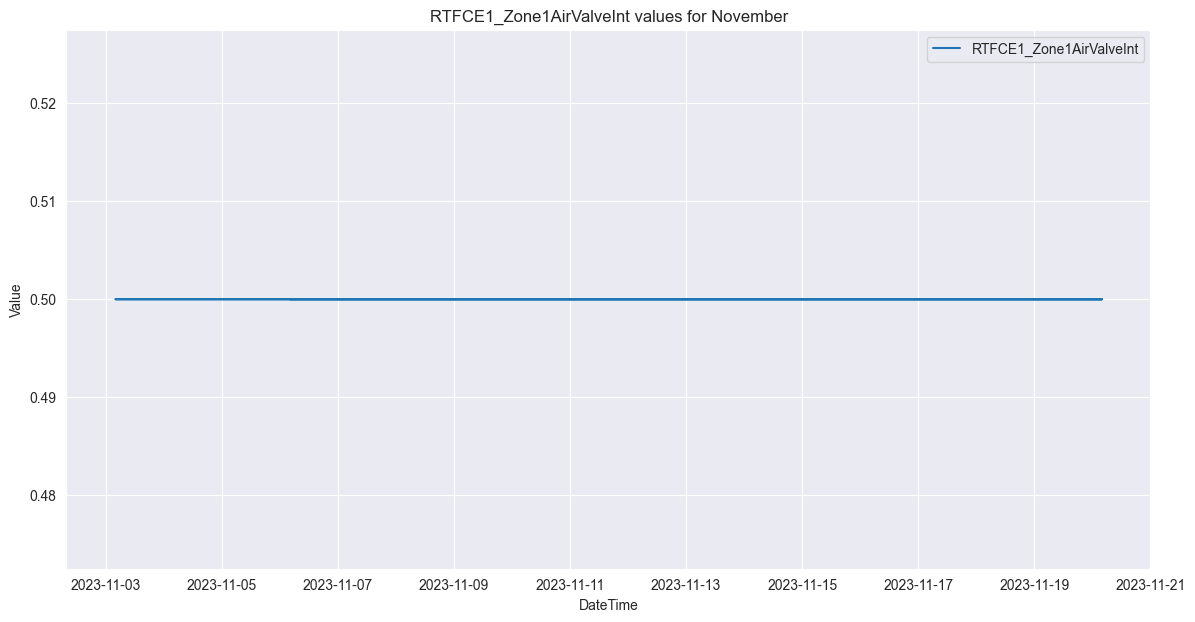

In [57]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirValveInt', 'November')

Staitstics for RTFCE1_Zone1AirValveInt - March: 
Mean: 0.5
Median: 0.5
Standard Deviation: 0.0
Min: 0.5
Max: 0.5


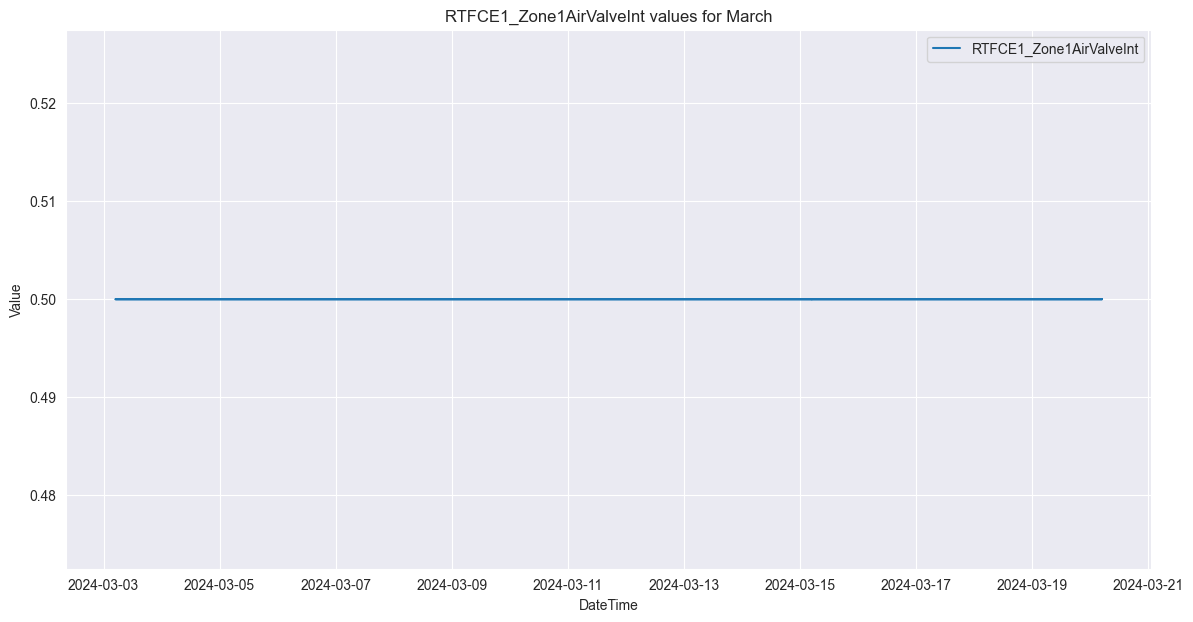

In [58]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirValveInt', 'March')

Staitstics for RTFCE1_Zone1AirValvePos - November: 
Mean: 46.88795944467226
Median: 36.280995695679984
Standard Deviation: 29.007267118553717
Min: 8.391203880310059
Max: 98.0901370207723


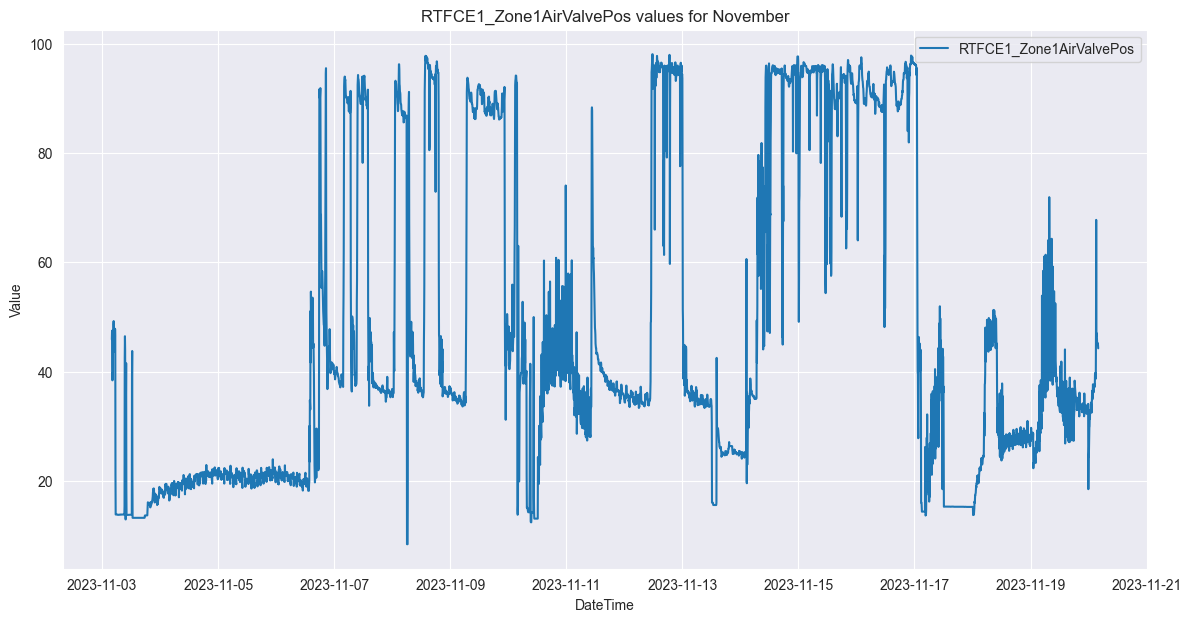

In [59]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirValvePos', 'November')

Staitstics for RTFCE1_Zone1AirValvePos - March: 
Mean: 53.823439927761484
Median: 40.62019263954163
Standard Deviation: 30.615610267855303
Min: 2.2566567056743305
Max: 98.95793642944336


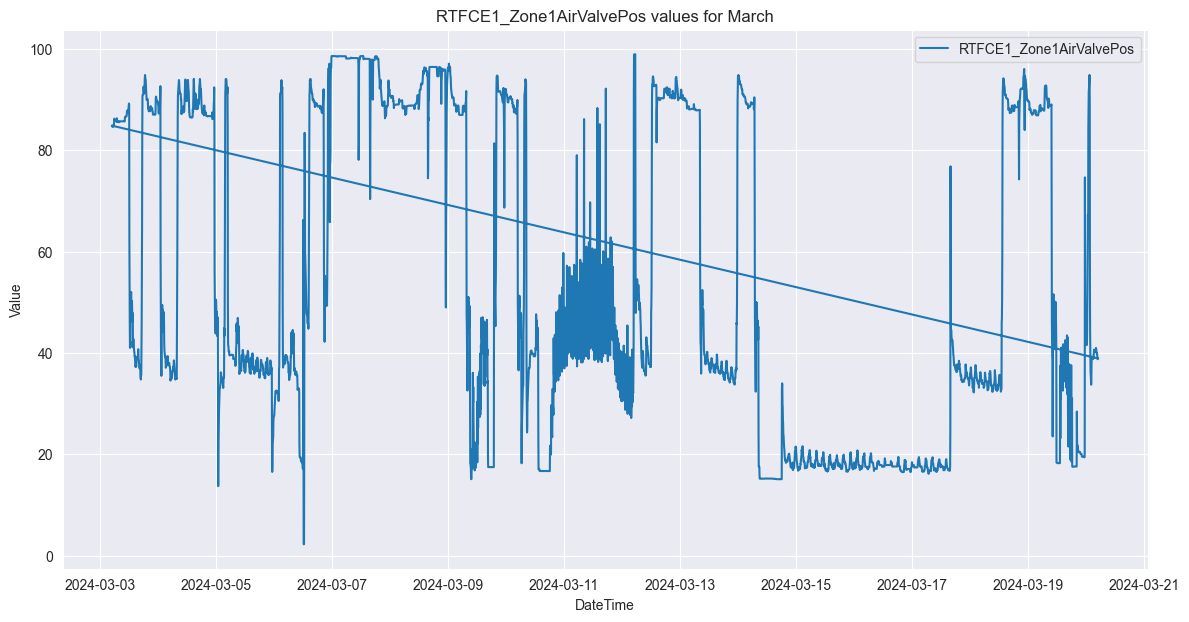

In [60]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirValvePos', 'March')

Staitstics for RTFCE1_Zone1AirFlow - November: 
Mean: 51.63728462650692
Median: 32.077204676291146
Standard Deviation: 41.294866895498146
Min: 12.637764851379394
Max: 118.33204027364096


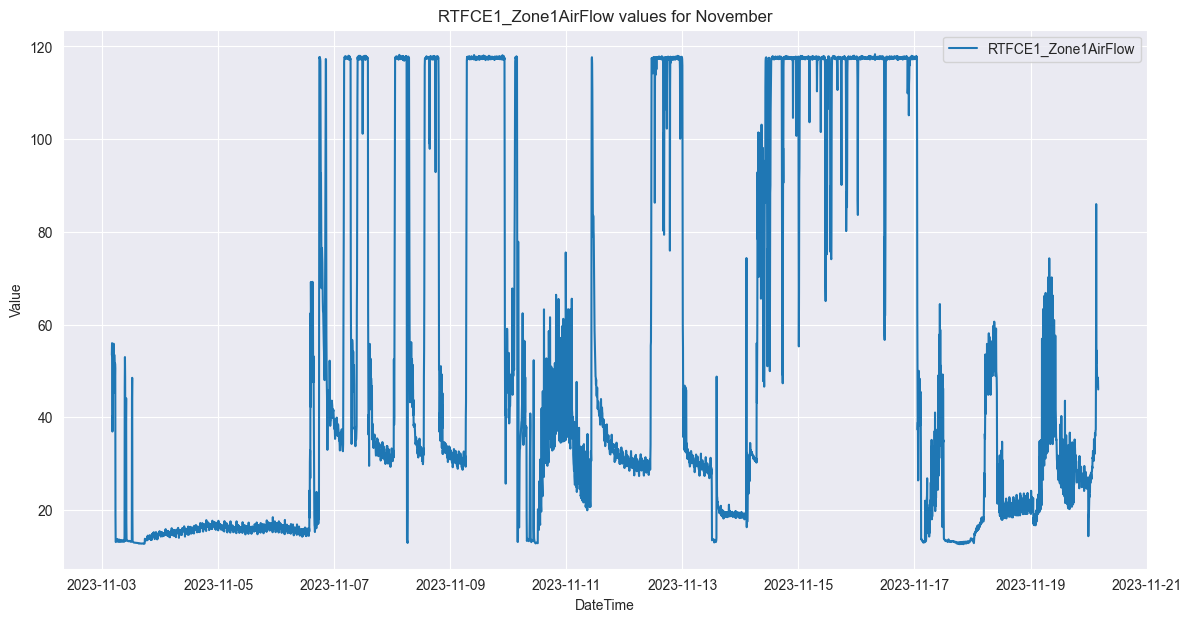

In [61]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirFlow', 'November')

Staitstics for RTFCE1_Zone1AirFlow - March: 
Mean: 62.03002717101137
Median: 38.41244199249903
Standard Deviation: 44.40590401683903
Min: 11.74887957654635
Max: 118.13377203821818


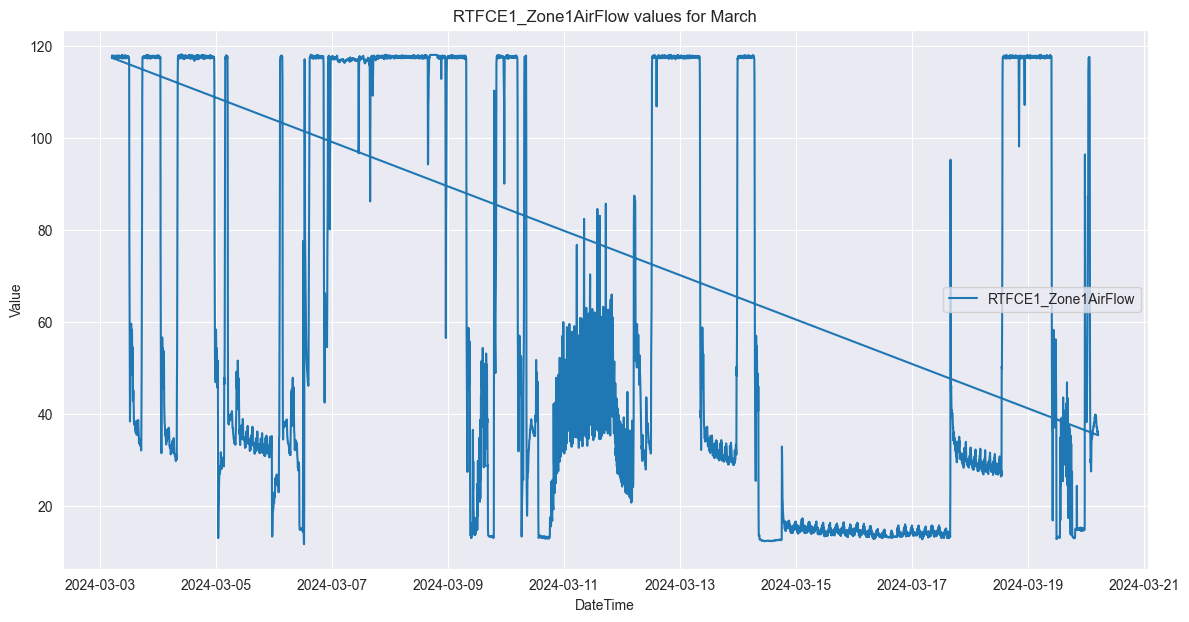

In [62]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirFlow', 'March')

Staitstics for RTFCE1_Zone1AirValveDer - November: 
Mean: 0.10000000149011612
Median: 0.10000000149011612
Standard Deviation: 0.0
Min: 0.10000000149011612
Max: 0.10000000149011612


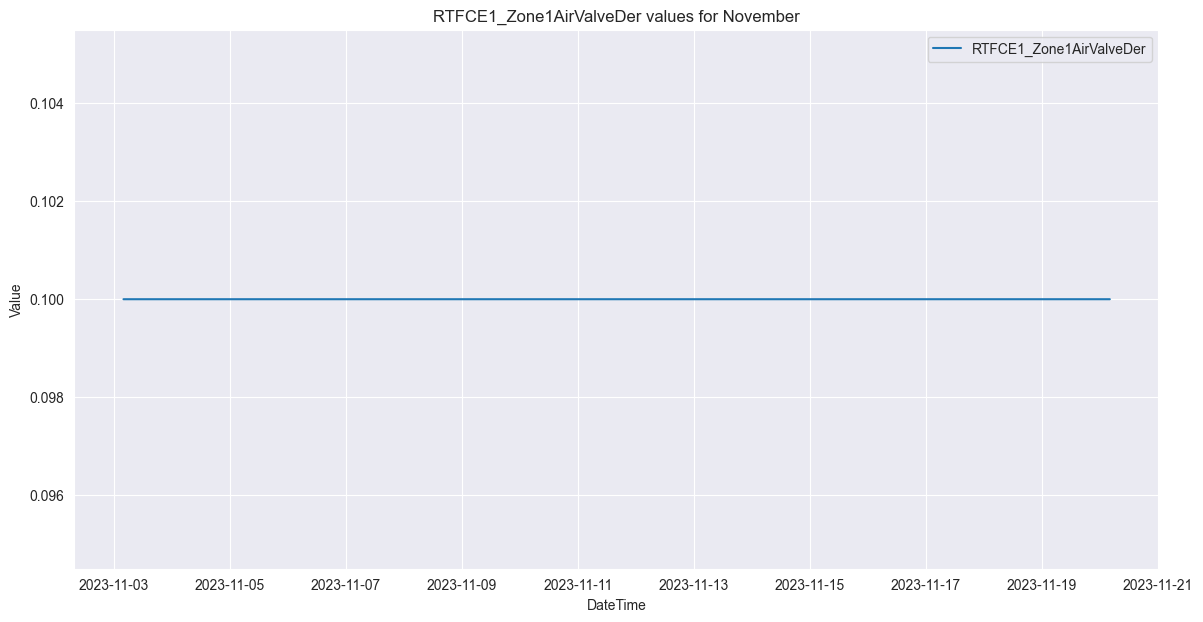

In [63]:
plot_tag_data(november_df, 'RTFCE1_Zone1AirValveDer', 'November')

Staitstics for RTFCE1_Zone1AirValveDer - March: 
Mean: 0.10000000149011612
Median: 0.10000000149011612
Standard Deviation: 0.0
Min: 0.10000000149011612
Max: 0.10000000149011612


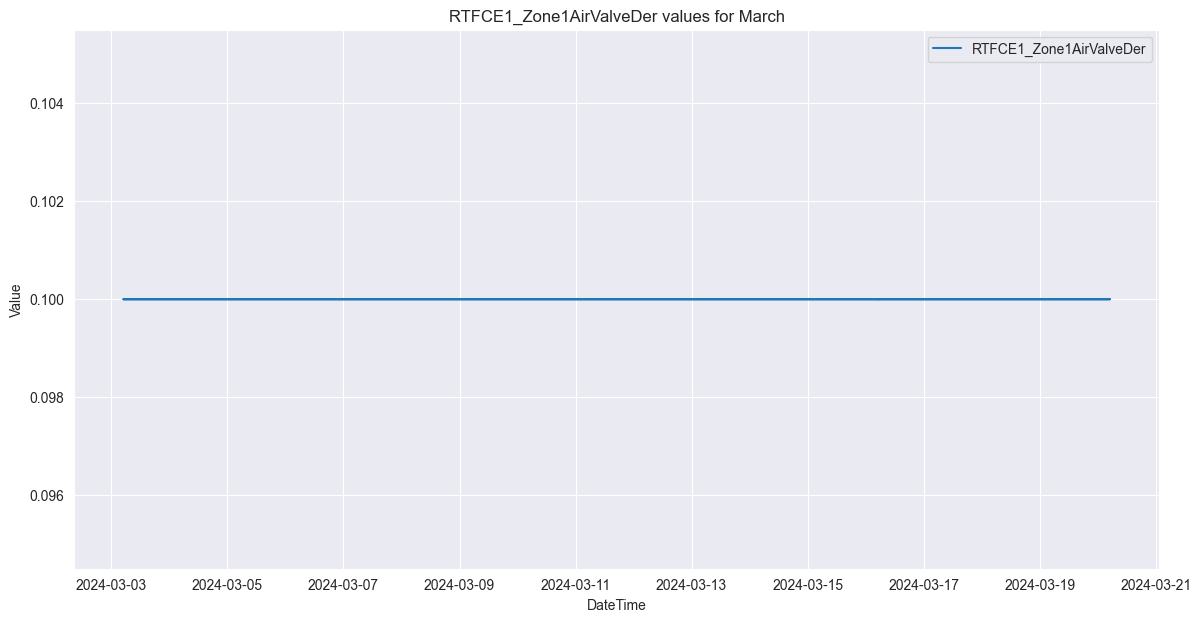

In [64]:
plot_tag_data(march_df, 'RTFCE1_Zone1AirValveDer', 'March')

In [102]:
march_df = march_df.drop_duplicates(subset=['TagDateTime', 'TagName'])
pivot_df = march_df.pivot(index='TagDateTime', columns='TagName', values='TagValue')
pivot_df
# pivot_df.reset_index(inplace=True)


TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
TagDateTime,,,,,,,,,,,,,,,,,,,,,
2024-03-03 05:00:00,117.378206,89864.185027,1.173707,0.1,0.75,0.5,85.197689,84.866944,120.000000,100.006470,...,96.817119,100.000000,0.0,1.2,0.0,1576.557397,9.0,1.0,100.000000,1900.0
2024-03-03 05:05:00,117.868868,90240.435257,1.178962,0.1,0.75,0.5,84.396773,84.893530,120.000000,99.977112,...,96.817100,100.000000,0.0,1.2,0.0,1574.663227,9.0,1.0,100.000000,1900.0
2024-03-03 05:10:00,117.595904,90030.026392,1.175771,0.1,0.75,0.5,84.796862,84.830065,120.000000,100.015814,...,96.817119,100.000000,0.0,1.2,0.0,1564.672723,9.0,1.0,100.000000,1900.0
2024-03-03 05:15:00,117.263417,89776.617695,1.171803,0.1,0.75,0.5,84.510928,84.655248,120.000000,100.071206,...,96.817113,100.000000,0.0,1.2,0.0,1567.406697,9.0,1.0,100.000000,1900.0
2024-03-03 05:20:00,117.802590,90187.367356,1.177923,0.1,0.75,0.5,85.105953,84.599869,120.000000,100.008234,...,96.756935,100.000000,0.0,1.2,0.0,1577.676933,9.0,1.0,100.000000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20 04:40:00,36.130264,27658.402912,1.192952,0.1,0.75,0.5,38.313431,38.927155,36.152301,30.286680,...,33.587170,30.126916,0.0,1.2,0.0,1900.509847,9.0,1.0,30.126916,1900.0
2024-03-20 04:45:00,36.305558,27796.333927,1.209549,0.1,0.75,0.5,39.949649,38.785831,36.247288,30.013321,...,33.552777,30.206072,0.0,1.2,0.0,1899.674653,9.0,1.0,30.206072,1900.0
2024-03-20 04:50:00,35.713942,27340.831687,1.187429,0.1,0.75,0.5,38.814501,38.788067,35.885214,30.077740,...,33.351374,29.904344,0.0,1.2,0.0,1900.404103,9.0,1.0,29.904344,1900.0


In [103]:
pivot_df.reset_index(inplace=True)
pivot_df

TagName,TagDateTime,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
0,2024-03-03 05:00:00,117.378206,89864.185027,1.173707,0.1,0.75,0.5,85.197689,84.866944,120.000000,...,96.817119,100.000000,0.0,1.2,0.0,1576.557397,9.0,1.0,100.000000,1900.0
1,2024-03-03 05:05:00,117.868868,90240.435257,1.178962,0.1,0.75,0.5,84.396773,84.893530,120.000000,...,96.817100,100.000000,0.0,1.2,0.0,1574.663227,9.0,1.0,100.000000,1900.0
2,2024-03-03 05:10:00,117.595904,90030.026392,1.175771,0.1,0.75,0.5,84.796862,84.830065,120.000000,...,96.817119,100.000000,0.0,1.2,0.0,1564.672723,9.0,1.0,100.000000,1900.0
3,2024-03-03 05:15:00,117.263417,89776.617695,1.171803,0.1,0.75,0.5,84.510928,84.655248,120.000000,...,96.817113,100.000000,0.0,1.2,0.0,1567.406697,9.0,1.0,100.000000,1900.0
4,2024-03-03 05:20:00,117.802590,90187.367356,1.177923,0.1,0.75,0.5,85.105953,84.599869,120.000000,...,96.756935,100.000000,0.0,1.2,0.0,1577.676933,9.0,1.0,100.000000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,2024-03-20 04:40:00,36.130264,27658.402912,1.192952,0.1,0.75,0.5,38.313431,38.927155,36.152301,...,33.587170,30.126916,0.0,1.2,0.0,1900.509847,9.0,1.0,30.126916,1900.0
4893,2024-03-20 04:45:00,36.305558,27796.333927,1.209549,0.1,0.75,0.5,39.949649,38.785831,36.247288,...,33.552777,30.206072,0.0,1.2,0.0,1899.674653,9.0,1.0,30.206072,1900.0
4894,2024-03-20 04:50:00,35.713942,27340.831687,1.187429,0.1,0.75,0.5,38.814501,38.788067,35.885214,...,33.351374,29.904344,0.0,1.2,0.0,1900.404103,9.0,1.0,29.904344,1900.0
4895,2024-03-20 04:55:00,35.683647,27319.144831,1.204657,0.1,0.75,0.5,39.451824,38.847015,35.508863,...,32.928272,29.590717,0.0,1.2,0.0,1899.992897,9.0,1.0,29.590717,1900.0


In [104]:
november_df = november_df.drop_duplicates(subset=['TagDateTime', 'TagName'])
pivot1_df = november_df.pivot(index='TagDateTime', columns='TagName', values='TagValue')
pivot1_df

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
TagDateTime,,,,,,,,,,,,,,,,,,,,,
2023-11-03 04:00:00,53.431383,40887.675631,1.185428,0.1,0.75,0.5,45.985979,45.871140,51.426904,45.078512,...,44.942517,42.772991,0.0,1.2,0.0,1904.017730,9.0,1.0,42.269201,1900.000000
2023-11-03 04:05:00,56.005240,42869.849796,1.199604,0.1,0.75,0.5,47.141250,47.474782,55.609051,46.677668,...,46.174805,46.340874,0.0,1.2,0.0,1903.106637,9.0,1.0,46.340874,1900.000000
2023-11-03 04:10:00,42.637070,32651.439754,1.202939,0.1,0.75,0.5,40.740369,40.858088,43.093815,35.311426,...,37.517294,35.946209,0.0,1.2,0.0,1899.784057,9.0,1.0,36.000892,1900.000000
2023-11-03 04:15:00,36.941372,28267.066204,1.178831,0.1,0.75,0.5,37.533018,38.392273,34.888186,31.360948,...,34.028604,29.073487,0.0,1.2,0.0,1912.248290,9.0,1.0,29.073487,1900.000000
2023-11-03 04:20:00,40.328916,30870.495538,1.193797,0.1,0.75,0.5,39.139175,39.734990,39.942299,33.647087,...,35.919335,33.318764,0.0,1.2,0.0,1903.751430,9.0,1.0,33.566510,1900.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20 03:40:00,47.644584,36475.926406,1.191407,0.1,0.75,0.5,44.941479,45.212376,47.759170,39.981212,...,41.216160,39.799307,0.0,1.2,0.0,1834.006063,9.0,1.0,39.799307,1833.400790
2023-11-20 03:45:00,48.616802,37224.387234,1.212844,0.1,0.75,0.5,45.245640,45.239755,48.570804,40.083704,...,41.278363,40.475668,0.0,1.2,0.0,1836.530297,9.0,1.0,40.475668,1838.317383
2023-11-20 03:50:00,46.684000,35737.799862,1.188622,0.1,0.75,0.5,45.625181,45.146692,46.790308,39.281043,...,40.706019,38.991922,0.0,1.2,0.0,1844.634910,9.0,1.0,38.991931,1843.226697


In [106]:
pivot1_df.reset_index(inplace=True)
pivot1_df

TagName,TagDateTime,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
0,2023-11-03 04:00:00,53.431383,40887.675631,1.185428,0.1,0.75,0.5,45.985979,45.871140,51.426904,...,44.942517,42.772991,0.0,1.2,0.0,1904.017730,9.0,1.0,42.269201,1900.000000
1,2023-11-03 04:05:00,56.005240,42869.849796,1.199604,0.1,0.75,0.5,47.141250,47.474782,55.609051,...,46.174805,46.340874,0.0,1.2,0.0,1903.106637,9.0,1.0,46.340874,1900.000000
2,2023-11-03 04:10:00,42.637070,32651.439754,1.202939,0.1,0.75,0.5,40.740369,40.858088,43.093815,...,37.517294,35.946209,0.0,1.2,0.0,1899.784057,9.0,1.0,36.000892,1900.000000
3,2023-11-03 04:15:00,36.941372,28267.066204,1.178831,0.1,0.75,0.5,37.533018,38.392273,34.888186,...,34.028604,29.073487,0.0,1.2,0.0,1912.248290,9.0,1.0,29.073487,1900.000000
4,2023-11-03 04:20:00,40.328916,30870.495538,1.193797,0.1,0.75,0.5,39.139175,39.734990,39.942299,...,35.919335,33.318764,0.0,1.2,0.0,1903.751430,9.0,1.0,33.566510,1900.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,2023-11-20 03:40:00,47.644584,36475.926406,1.191407,0.1,0.75,0.5,44.941479,45.212376,47.759170,...,41.216160,39.799307,0.0,1.2,0.0,1834.006063,9.0,1.0,39.799307,1833.400790
4893,2023-11-20 03:45:00,48.616802,37224.387234,1.212844,0.1,0.75,0.5,45.245640,45.239755,48.570804,...,41.278363,40.475668,0.0,1.2,0.0,1836.530297,9.0,1.0,40.475668,1838.317383
4894,2023-11-20 03:50:00,46.684000,35737.799862,1.188622,0.1,0.75,0.5,45.625181,45.146692,46.790308,...,40.706019,38.991922,0.0,1.2,0.0,1844.634910,9.0,1.0,38.991931,1843.226697
4895,2023-11-20 03:55:00,47.965789,36723.191725,1.202205,0.1,0.75,0.5,45.223978,44.832437,47.833577,...,40.813588,39.861313,0.0,1.2,0.0,1848.047077,9.0,1.0,39.861313,1848.142990


In [120]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
# pca = PCA(n_components=2)
df1 = pca.fit_transform(pivot_df)
df1.shape

(4897, 1)

In [121]:
pca.explained_variance_ratio_


array([0.99996214])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

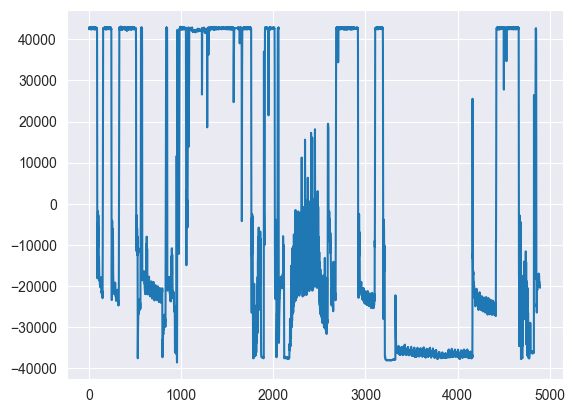

In [125]:
plt.plot(df1)

In [127]:
pivot1_df = pivot1_df.drop("TagDateTime", axis=1)

In [128]:
pca = PCA(0.95)
# pca = PCA(n_components=2)
df2 = pca.fit_transform(pivot1_df)
df2.shape

(4897, 1)

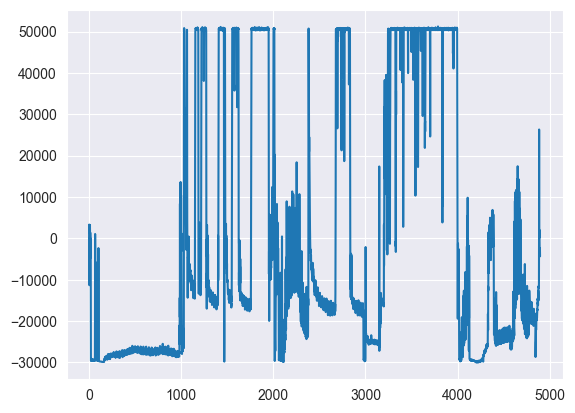

In [129]:
plt.plot(df2)

In [130]:
# Converting into two dimensions
pca = PCA(n_components=2)
df1 = pca.fit_transform(pivot_df)
df1


array([[ 42545.18225135,   -118.18342072],
       [ 42919.88684782,   -117.45550481],
       [ 42710.46413649,   -125.98763563],
       ...,
       [-20207.18871866,    216.31085571],
       [-20231.71848227,    218.62566132],
       [-20440.60484504,    218.14323385]])

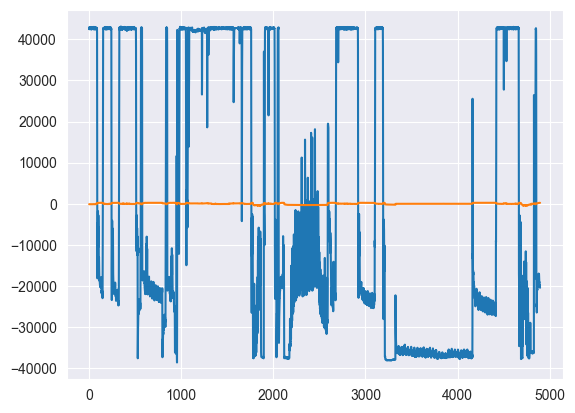

In [131]:
plt.plot(df1)

In [132]:
pca = PCA(n_components=2)
df2 = pca.fit_transform(pivot1_df)
df2

array([[ 1341.3319832 ,   294.64496192],
       [ 3326.75532854,   291.4632693 ],
       [-6928.3449382 ,   343.09387026],
       ...,
       [-3827.88372152,   241.85061977],
       [-2841.98676833,   248.70353723],
       [-4338.50130452,   261.3714251 ]])

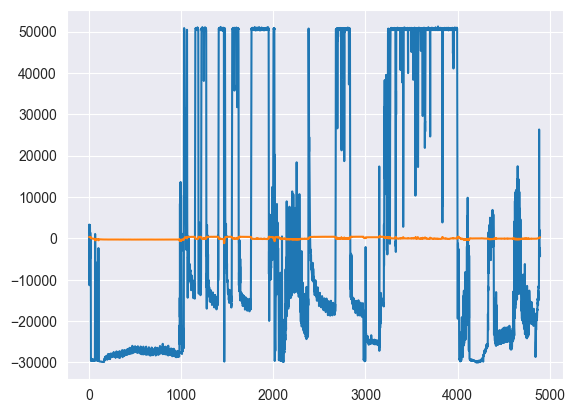

In [133]:
plt.plot(df2)

In [135]:
df1.shape

(4897, 2)

In [136]:
df2.shape

(4897, 2)

In [144]:
df1['Month'] = 'March'
df2['Month'] = 'November'

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [147]:
combined_df = pd.concat([df1, df2])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [148]:
df1

array([[ 42545.18225135,   -118.18342072],
       [ 42919.88684782,   -117.45550481],
       [ 42710.46413649,   -125.98763563],
       ...,
       [-20207.18871866,    216.31085571],
       [-20231.71848227,    218.62566132],
       [-20440.60484504,    218.14323385]])

In [149]:
df2

array([[ 1341.3319832 ,   294.64496192],
       [ 3326.75532854,   291.4632693 ],
       [-6928.3449382 ,   343.09387026],
       ...,
       [-3827.88372152,   241.85061977],
       [-2841.98676833,   248.70353723],
       [-4338.50130452,   261.3714251 ]])

In [155]:
df_pca_march = pd.DataFrame(df1, columns=['PC1', 'PC2'])
df_pca_november = pd.DataFrame(df2, columns=['PC1', 'PC2'])

In [156]:
df_pca_march

,PC1,PC2
0,42545.182251,-118.183421
1,42919.886848,-117.455505
2,42710.464136,-125.987636
3,42458.336024,-125.656236
4,42867.200395,-115.714942
...,...,...
4892,-19889.370731,216.722044
4893,-19753.705471,218.496338
4894,-20207.188719,216.310856
4895,-20231.718482,218.625661


In [157]:
df_pca_november['Month'] = 'November'
df_pca_march['Month'] = 'March'

In [158]:
combined_df = pd.concat([df_pca_march, df_pca_november])

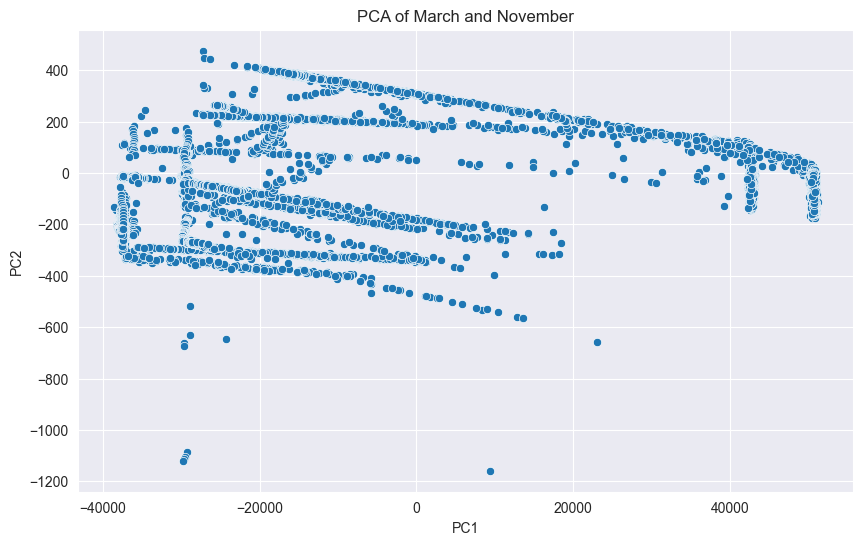

In [159]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=combined_df)
plt.title('PCA of March and November')
plt.show()

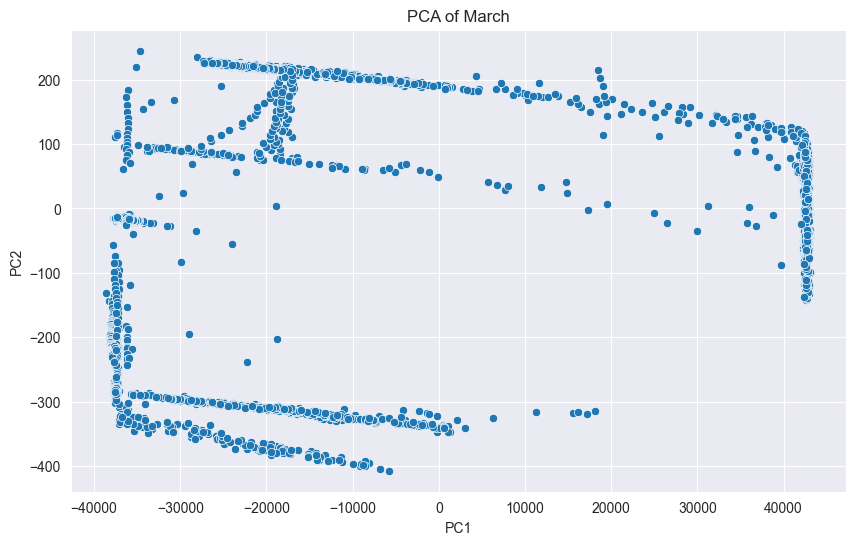

In [175]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_march)
plt.title('PCA of March')
plt.show()

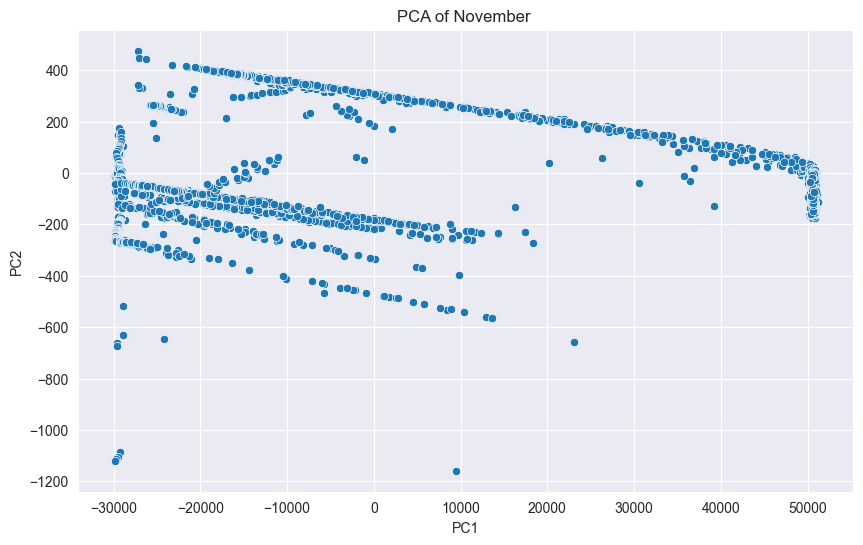

In [173]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_november)
plt.title('PCA of November ')
plt.show()

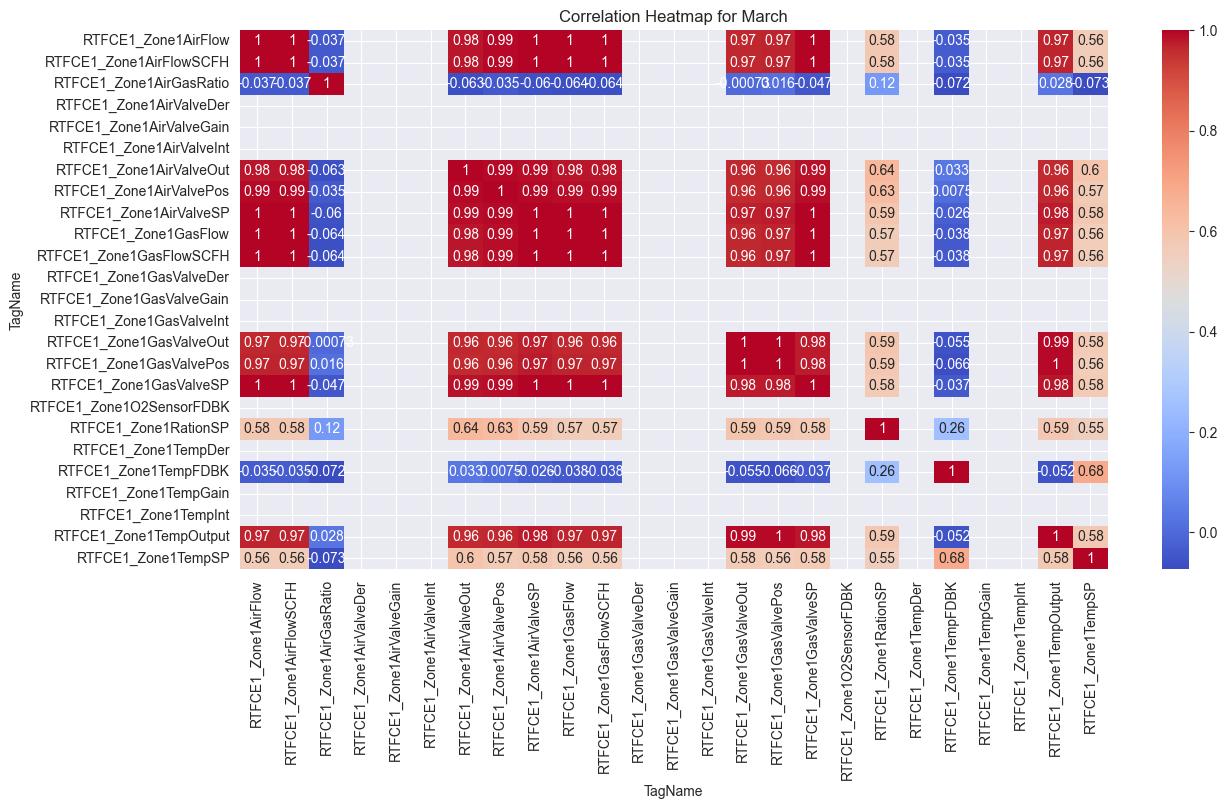

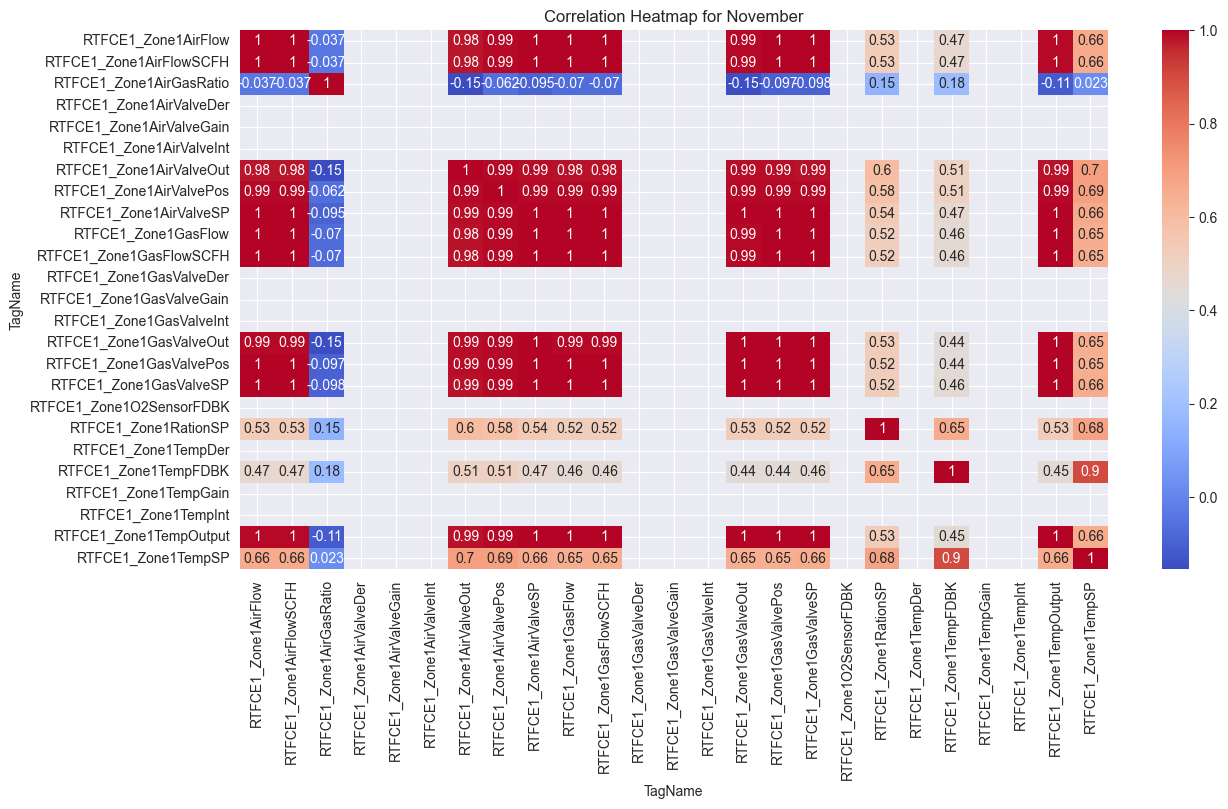

In [180]:
# Calculate correlation matrices
corr_march = pivot_df.corr()
corr_november = pivot1_df.corr()

# Plot heatmaps
plt.figure(figsize=(14, 7))
sns.heatmap(corr_march, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for March')
plt.show()

plt.figure(figsize=(14, 7))
sns.heatmap(corr_november, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for November')
plt.show()



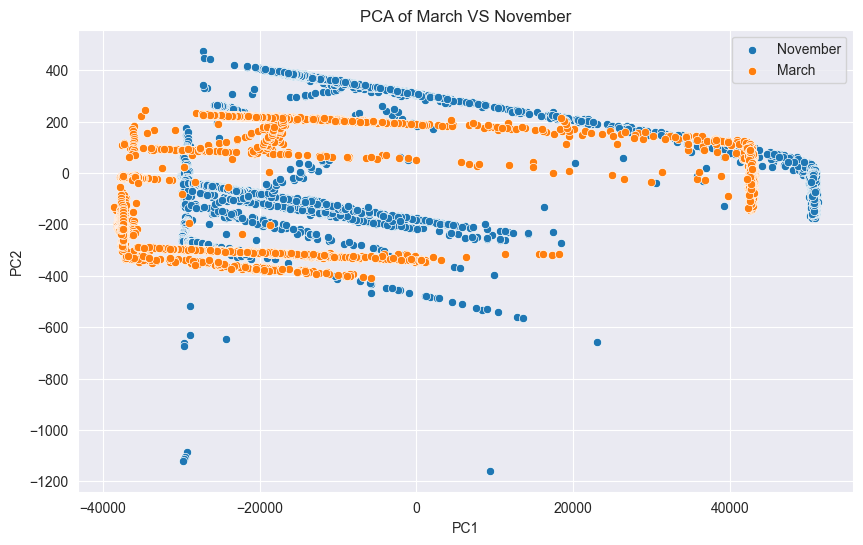

In [176]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_november, label='November')
sns.scatterplot(x='PC1', y='PC2', data=df_pca_march, label='March')
plt.title('PCA of March VS November')
plt.show()

In [184]:
pivot_df

TagName,RTFCE1_Zone1AirFlow,RTFCE1_Zone1AirFlowSCFH,RTFCE1_Zone1AirGasRatio,RTFCE1_Zone1AirValveDer,RTFCE1_Zone1AirValveGain,RTFCE1_Zone1AirValveInt,RTFCE1_Zone1AirValveOut,RTFCE1_Zone1AirValvePos,RTFCE1_Zone1AirValveSP,RTFCE1_Zone1GasFlow,...,RTFCE1_Zone1GasValvePos,RTFCE1_Zone1GasValveSP,RTFCE1_Zone1O2SensorFDBK,RTFCE1_Zone1RationSP,RTFCE1_Zone1TempDer,RTFCE1_Zone1TempFDBK,RTFCE1_Zone1TempGain,RTFCE1_Zone1TempInt,RTFCE1_Zone1TempOutput,RTFCE1_Zone1TempSP
0,117.378206,89864.185027,1.173707,0.1,0.75,0.5,85.197689,84.866944,120.000000,100.006470,...,96.817119,100.000000,0.0,1.2,0.0,1576.557397,9.0,1.0,100.000000,1900.0
1,117.868868,90240.435257,1.178962,0.1,0.75,0.5,84.396773,84.893530,120.000000,99.977112,...,96.817100,100.000000,0.0,1.2,0.0,1574.663227,9.0,1.0,100.000000,1900.0
2,117.595904,90030.026392,1.175771,0.1,0.75,0.5,84.796862,84.830065,120.000000,100.015814,...,96.817119,100.000000,0.0,1.2,0.0,1564.672723,9.0,1.0,100.000000,1900.0
3,117.263417,89776.617695,1.171803,0.1,0.75,0.5,84.510928,84.655248,120.000000,100.071206,...,96.817113,100.000000,0.0,1.2,0.0,1567.406697,9.0,1.0,100.000000,1900.0
4,117.802590,90187.367356,1.177923,0.1,0.75,0.5,85.105953,84.599869,120.000000,100.008234,...,96.756935,100.000000,0.0,1.2,0.0,1577.676933,9.0,1.0,100.000000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,36.130264,27658.402912,1.192952,0.1,0.75,0.5,38.313431,38.927155,36.152301,30.286680,...,33.587170,30.126916,0.0,1.2,0.0,1900.509847,9.0,1.0,30.126916,1900.0
4893,36.305558,27796.333927,1.209549,0.1,0.75,0.5,39.949649,38.785831,36.247288,30.013321,...,33.552777,30.206072,0.0,1.2,0.0,1899.674653,9.0,1.0,30.206072,1900.0
4894,35.713942,27340.831687,1.187429,0.1,0.75,0.5,38.814501,38.788067,35.885214,30.077740,...,33.351374,29.904344,0.0,1.2,0.0,1900.404103,9.0,1.0,29.904344,1900.0
4895,35.683647,27319.144831,1.204657,0.1,0.75,0.5,39.451824,38.847015,35.508863,29.621426,...,32.928272,29.590717,0.0,1.2,0.0,1899.992897,9.0,1.0,29.590717,1900.0
